# Clase - Computación Distribuida

## Pyspark Hands-on 
#### Marcelo Medel Vergara - Diplomado Data Engineer USACH


### Carpeta con archivos del notebook

Data: https://drive.google.com/drive/u/0/folders/1_nzJ7j44ZMacRGH8t-0ZgszX0-MM0pcq


### Read / Write datos desde múltiples fuentes de datos
<!-- insert url -->

Documentación de referencia: https://spark.apache.org/docs/3.5.2/api/python/reference/pyspark.sql/io.html

- `pyspark.sql.SparkSession.read`
- `pyspark.sql.DataFrameWriter`

In [1]:
import findspark
findspark.find()

'/Users/marcelomedel/opt/anaconda3/envs/pyspark-v2/lib/python3.10/site-packages/pyspark'

In [2]:
findspark.init()

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("hands-on-2").getOrCreate()
spark.active()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/14 19:38:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
path_csv = "data/2015-summary.csv"

df = spark.read.csv(path_csv, header=True, sep=",", inferSchema=True)
df.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

In [9]:
path_json = "data/2015-summary-v2.json"
df.write.json(path_json, mode = "overwrite") # overwrite, append, error, ignore

In [10]:
spark.read.json(path_json).show(10)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
|    United States|          Singapore|    1|
|    United States|            Grenada|   62|
|       Costa Rica|      United States|  588|
|          Senegal|      United States|   40|
|          Moldova|      United States|    1|
+-----------------+-------------------+-----+
only showing top 10 rows



In [11]:
path_txt = 'data/Don-Quijote.txt'
spark.read.text(path_txt).show()

+--------------------+
|               value|
+--------------------+
|The Project Guten...|
|                    |
|This ebook is for...|
|most other parts ...|
|whatsoever. You m...|
|of the Project Gu...|
|at www.gutenberg....|
|you will have to ...|
|before using this...|
|                    |
|  Title: Don Quijote|
|                    |
|Author: Miguel de...|
|                    |
|Release date: Dec...|
|                M...|
|                    |
|   Language: Spanish|
|                    |
|Credits: an anony...|
+--------------------+
only showing top 20 rows



In [12]:
path_json = "data/2015-summary-v2.json"
spark.read.format("json").load(path_json).show(10)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
|    United States|          Singapore|    1|
|    United States|            Grenada|   62|
|       Costa Rica|      United States|  588|
|          Senegal|      United States|   40|
|          Moldova|      United States|    1|
+-----------------+-------------------+-----+
only showing top 10 rows



In [13]:
spark.read.format("csv").load(path_csv).show(10)

+-----------------+-------------------+-----+
|              _c0|                _c1|  _c2|
+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
|    United States|          Singapore|    1|
|    United States|            Grenada|   62|
|       Costa Rica|      United States|  588|
|          Senegal|      United States|   40|
+-----------------+-------------------+-----+
only showing top 10 rows



In [17]:
df = spark.read.parquet("data/linkedin.parquet")
df.show(10, truncate=False)

+----------+-----------+--------------------------------------------------+----------+----------+-------------------+----------------------------+-------+--------------+-----+--------------------------+---------+------------+---------------------------------+--------------+--------------+
|job_id    |company_id |title                                             |min_salary|pay_period|formatted_work_type|location                    |applies|remote_allowed|views|formatted_experience_level|sponsored|company_size|industry                         |employee_count|follower_count|
+----------+-----------+--------------------------------------------------+----------+----------+-------------------+----------------------------+-------+--------------+-----+--------------------------+---------+------------+---------------------------------+--------------+--------------+
|2148434586|2780388.0  |Manager, Salesforce Platform                      |98640.0   |YEARLY    |Full-time          |New Hampshire

In [16]:
df.show(1, vertical=True, truncate=False)

-RECORD 0--------------------------------------------------
 job_id                     | 2148434586                   
 company_id                 | 2780388.0                    
 title                      | Manager, Salesforce Platform 
 min_salary                 | 98640.0                      
 pay_period                 | YEARLY                       
 formatted_work_type        | Full-time                    
 location                   | New Hampshire, United States 
 applies                    | 0.0                          
 remote_allowed             | 0.0                          
 views                      | 0.0                          
 formatted_experience_level | Mid-Senior level             
 sponsored                  | 0                            
 company_size               | 5.0                          
 industry                   | Real Estate                  
 employee_count             | 1132.0                       
 follower_count             | 29459.0   

In [18]:
df.printSchema()

root
 |-- job_id: long (nullable = true)
 |-- company_id: double (nullable = true)
 |-- title: string (nullable = true)
 |-- min_salary: double (nullable = true)
 |-- pay_period: string (nullable = true)
 |-- formatted_work_type: string (nullable = true)
 |-- location: string (nullable = true)
 |-- applies: double (nullable = true)
 |-- remote_allowed: double (nullable = true)
 |-- views: double (nullable = true)
 |-- formatted_experience_level: string (nullable = true)
 |-- sponsored: integer (nullable = true)
 |-- company_size: double (nullable = true)
 |-- industry: string (nullable = true)
 |-- employee_count: double (nullable = true)
 |-- follower_count: double (nullable = true)



### Data Type Conversion


In [21]:
from pyspark.sql.functions import col
from pyspark.sql.types import StringType, IntegerType, BooleanType

df = df.withColumn("job_id", col("job_id").cast(StringType()))
df = df.withColumn("company_id", col("company_id").cast(StringType()))
df = df.withColumn("min_salary", col("min_salary").cast(IntegerType()))
df = df.withColumn("remote_allowed", col("remote_allowed").cast(BooleanType()))
df.printSchema()

root
 |-- job_id: string (nullable = true)
 |-- company_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- min_salary: integer (nullable = true)
 |-- pay_period: string (nullable = true)
 |-- formatted_work_type: string (nullable = true)
 |-- location: string (nullable = true)
 |-- applies: double (nullable = true)
 |-- remote_allowed: boolean (nullable = true)
 |-- views: double (nullable = true)
 |-- formatted_experience_level: string (nullable = true)
 |-- sponsored: integer (nullable = true)
 |-- company_size: double (nullable = true)
 |-- industry: string (nullable = true)
 |-- employee_count: double (nullable = true)
 |-- follower_count: double (nullable = true)



In [20]:
df.show()

+----------+-----------+--------------------+----------+----------+-------------------+--------------------+-------+--------------+-----+--------------------------+---------+------------+--------------------+--------------+--------------+
|    job_id| company_id|               title|min_salary|pay_period|formatted_work_type|            location|applies|remote_allowed|views|formatted_experience_level|sponsored|company_size|            industry|employee_count|follower_count|
+----------+-----------+--------------------+----------+----------+-------------------+--------------------+-------+--------------+-----+--------------------------+---------+------------+--------------------+--------------+--------------+
|2148434586|  2780388.0|Manager, Salesfor...|     98640|    YEARLY|          Full-time|New Hampshire, Un...|    0.0|         false|  0.0|          Mid-Senior level|        0|         5.0|         Real Estate|        1132.0|       29459.0|
|2148434616|    15564.0|Lead Solar Mainte...

### String Manipulation



In [22]:
from pyspark.sql.functions import substring, concat, lower, upper, split

df = df.withColumn("pay_period", substring("pay_period",1,1))
df.show()

+----------+-----------+--------------------+----------+----------+-------------------+--------------------+-------+--------------+-----+--------------------------+---------+------------+--------------------+--------------+--------------+
|    job_id| company_id|               title|min_salary|pay_period|formatted_work_type|            location|applies|remote_allowed|views|formatted_experience_level|sponsored|company_size|            industry|employee_count|follower_count|
+----------+-----------+--------------------+----------+----------+-------------------+--------------------+-------+--------------+-----+--------------------------+---------+------------+--------------------+--------------+--------------+
|2148434586|  2780388.0|Manager, Salesfor...|     98640|         Y|          Full-time|New Hampshire, Un...|    0.0|         false|  0.0|          Mid-Senior level|        0|         5.0|         Real Estate|        1132.0|       29459.0|
|2148434616|    15564.0|Lead Solar Mainte...

In [28]:
from pyspark.sql.functions import lit
df.withColumn("title_extendido",lower(concat("formatted_experience_level", lit(" - "), "title"))).show(10, truncate=False)
df.withColumn("title_extendido",upper(concat("formatted_experience_level", lit(" - "), "title"))).show(10, truncate=True)

+----------+-----------+--------------------------------------------------+----------+----------+-------------------+----------------------------+-------+--------------+-----+--------------------------+---------+------------+---------------------------------+--------------+--------------+---------------------------------------------------------------------+
|job_id    |company_id |title                                             |min_salary|pay_period|formatted_work_type|location                    |applies|remote_allowed|views|formatted_experience_level|sponsored|company_size|industry                         |employee_count|follower_count|title_extendido                                                      |
+----------+-----------+--------------------------------------------------+----------+----------+-------------------+----------------------------+-------+--------------+-----+--------------------------+---------+------------+---------------------------------+--------------+------

In [36]:
df = df.withColumn("location2", split("location",","))
df.show(truncate=False)

+----------+-----------+--------------------------------------------------+----------+----------+-------------------+----------------------------+-------+--------------+-----+--------------------------+---------+------------+----------------------------------+--------------+--------------+-------------------------------+
|job_id    |company_id |title                                             |min_salary|pay_period|formatted_work_type|location                    |applies|remote_allowed|views|formatted_experience_level|sponsored|company_size|industry                          |employee_count|follower_count|location2                      |
+----------+-----------+--------------------------------------------------+----------+----------+-------------------+----------------------------+-------+--------------+-----+--------------------------+---------+------------+----------------------------------+--------------+--------------+-------------------------------+
|2148434586|2780388.0  |Manager

In [31]:
df.printSchema()

root
 |-- job_id: string (nullable = true)
 |-- company_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- min_salary: integer (nullable = true)
 |-- pay_period: string (nullable = true)
 |-- formatted_work_type: string (nullable = true)
 |-- location: string (nullable = true)
 |-- applies: double (nullable = true)
 |-- remote_allowed: boolean (nullable = true)
 |-- views: double (nullable = true)
 |-- formatted_experience_level: string (nullable = true)
 |-- sponsored: integer (nullable = true)
 |-- company_size: double (nullable = true)
 |-- industry: string (nullable = true)
 |-- employee_count: double (nullable = true)
 |-- follower_count: double (nullable = true)
 |-- location2: array (nullable = true)
 |    |-- element: string (containsNull = false)



In [38]:
df.select("*",df.location2[0].alias("ciudad"), df.location2[1].alias("estado")).show()

+----------+-----------+--------------------+----------+----------+-------------------+--------------------+-------+--------------+-----+--------------------------+---------+------------+--------------------+--------------+--------------+--------------------+--------------------+--------------+
|    job_id| company_id|               title|min_salary|pay_period|formatted_work_type|            location|applies|remote_allowed|views|formatted_experience_level|sponsored|company_size|            industry|employee_count|follower_count|           location2|              ciudad|        estado|
+----------+-----------+--------------------+----------+----------+-------------------+--------------------+-------+--------------+-----+--------------------------+---------+------------+--------------------+--------------+--------------+--------------------+--------------------+--------------+
|2148434586|  2780388.0|Manager, Salesfor...|     98640|         Y|          Full-time|New Hampshire, Un...|    

### Working with Dates


In [41]:
from pyspark.sql.types import StructField, StructType, StringType

data_dates = [
    ("A","2023-01-01"),
    ("b","2023-02-01"),
    ("C","2024-02-01"),
    ("E","2023-05-01"),
]
schema = StructType([
    StructField("tipo",StringType()),
    StructField("fecha",StringType()),
])

df_dates = spark.createDataFrame(data_dates, schema)
df_dates.show()

+----+----------+
|tipo|     fecha|
+----+----------+
|   A|2023-01-01|
|   b|2023-02-01|
|   C|2024-02-01|
|   E|2023-05-01|
+----+----------+



In [45]:
from pyspark.sql.functions import to_date, date_format, current_date, datediff

df_dates = df_dates.withColumn("fecha_dt", to_date(col("fecha"), "yyyy-MM-dd"))
df_dates.printSchema()
df_dates.show(10)

root
 |-- tipo: string (nullable = true)
 |-- fecha: string (nullable = true)
 |-- fecha_dt: date (nullable = true)

+----+----------+----------+
|tipo|     fecha|  fecha_dt|
+----+----------+----------+
|   A|2023-01-01|2023-01-01|
|   b|2023-02-01|2023-02-01|
|   C|2024-02-01|2024-02-01|
|   E|2023-05-01|2023-05-01|
+----+----------+----------+



In [53]:
df_dates = df_dates.withColumn("format_dt", date_format("fecha_dt", "yyyy-MM-dd"))
df_dates = df_dates.withColumn("format_dt2", date_format("fecha", "yyMM"))
df_dates.printSchema()
df_dates.show()

root
 |-- tipo: string (nullable = true)
 |-- fecha: string (nullable = true)
 |-- fecha_dt: date (nullable = true)
 |-- format_dt: string (nullable = true)
 |-- format_dt2: string (nullable = true)

+----+----------+----------+----------+----------+
|tipo|     fecha|  fecha_dt| format_dt|format_dt2|
+----+----------+----------+----------+----------+
|   A|2023-01-01|2023-01-01|2023-01-01|      2301|
|   b|2023-02-01|2023-02-01|2023-02-01|      2302|
|   C|2024-02-01|2024-02-01|2024-02-01|      2402|
|   E|2023-05-01|2023-05-01|2023-05-01|      2305|
+----+----------+----------+----------+----------+



In [58]:
df_dates.withColumn("diff_days", datediff(current_date(),col("fecha_dt"))).show()

+----+----------+----------+----------+----------+---------+
|tipo|     fecha|  fecha_dt| format_dt|format_dt2|diff_days|
+----+----------+----------+----------+----------+---------+
|   A|2023-01-01|2023-01-01|2023-01-01|      2301|      652|
|   b|2023-02-01|2023-02-01|2023-02-01|      2302|      621|
|   C|2024-02-01|2024-02-01|2024-02-01|      2402|      256|
|   E|2023-05-01|2023-05-01|2023-05-01|      2305|      532|
+----+----------+----------+----------+----------+---------+



In [57]:
df_dates.where("fecha_dt >= current_date").withColumn("diff_days", datediff(current_date(),col("fecha_dt"))).show()

+----+-----+--------+---------+----------+---------+
|tipo|fecha|fecha_dt|format_dt|format_dt2|diff_days|
+----+-----+--------+---------+----------+---------+
+----+-----+--------+---------+----------+---------+



In [60]:
from pyspark.sql.functions import year, month, dayofmonth, dayofweek, date_add, date_sub

df_dates.withColumn("dayofweek",dayofweek("fecha_dt")).show()
df_dates.withColumn("dayofmonth",dayofmonth("fecha_dt")).show()
df_dates.withColumn("year",year("fecha_dt")).show()
df_dates.withColumn("month",month("fecha_dt")).show()

+----+----------+----------+----------+----------+---------+
|tipo|     fecha|  fecha_dt| format_dt|format_dt2|dayofweek|
+----+----------+----------+----------+----------+---------+
|   A|2023-01-01|2023-01-01|2023-01-01|      2301|        1|
|   b|2023-02-01|2023-02-01|2023-02-01|      2302|        4|
|   C|2024-02-01|2024-02-01|2024-02-01|      2402|        5|
|   E|2023-05-01|2023-05-01|2023-05-01|      2305|        2|
+----+----------+----------+----------+----------+---------+

+----+----------+----------+----------+----------+----------+
|tipo|     fecha|  fecha_dt| format_dt|format_dt2|dayofmonth|
+----+----------+----------+----------+----------+----------+
|   A|2023-01-01|2023-01-01|2023-01-01|      2301|         1|
|   b|2023-02-01|2023-02-01|2023-02-01|      2302|         1|
|   C|2024-02-01|2024-02-01|2024-02-01|      2402|         1|
|   E|2023-05-01|2023-05-01|2023-05-01|      2305|         1|
+----+----------+----------+----------+----------+----------+

+----+--------

In [61]:
df_dates.withColumn("date_plus7", date_add("fecha_dt",7)).show()
df_dates.withColumn("date_minus7", date_sub("fecha_dt",7)).show()

+----+----------+----------+----------+----------+----------+
|tipo|     fecha|  fecha_dt| format_dt|format_dt2|date_plus7|
+----+----------+----------+----------+----------+----------+
|   A|2023-01-01|2023-01-01|2023-01-01|      2301|2023-01-08|
|   b|2023-02-01|2023-02-01|2023-02-01|      2302|2023-02-08|
|   C|2024-02-01|2024-02-01|2024-02-01|      2402|2024-02-08|
|   E|2023-05-01|2023-05-01|2023-05-01|      2305|2023-05-08|
+----+----------+----------+----------+----------+----------+

+----+----------+----------+----------+----------+-----------+
|tipo|     fecha|  fecha_dt| format_dt|format_dt2|date_minus7|
+----+----------+----------+----------+----------+-----------+
|   A|2023-01-01|2023-01-01|2023-01-01|      2301| 2022-12-25|
|   b|2023-02-01|2023-02-01|2023-02-01|      2302| 2023-01-25|
|   C|2024-02-01|2024-02-01|2024-02-01|      2402| 2024-01-25|
|   E|2023-05-01|2023-05-01|2023-05-01|      2305| 2023-04-24|
+----+----------+----------+----------+----------+-----------+

In [67]:
from pyspark.sql.functions import date_trunc, current_timestamp

df = spark.range(1)
df.select(current_timestamp()).show(truncate=False)

df.select(date_trunc('dd', current_timestamp())).show()

+-----------------------+
|current_timestamp()    |
+-----------------------+
|2024-10-14 21:02:17.042|
+-----------------------+

+-----------------------------------+
|date_trunc(dd, current_timestamp())|
+-----------------------------------+
|                2024-10-14 00:00:00|
+-----------------------------------+



### Handling Missing Data



In [76]:
data = [
    ("F", 40, "La Serena", "2023-05-12"),
    ("G", None, "Antofagasta", "2022-09-18"),
    ("H", 27, None, "2023-02-14"),
    (None, 33, "Temuco", "2021-08-25"),
    ("J", 29, "Talca", None),
    ("K", 36, "Rancagua", "2023-04-01"),
    (None, None, "Chillán", None),
    ("M", 22, None, "2022-10-20"),
    ("N", None, "Osorno", "2021-12-05"),
    ("O", 31, None, None)
]

schema = StructType([
    StructField("tipo", StringType()),
    StructField("costo", IntegerType()),
    StructField("ciudad", StringType()),
    StructField("desde", StringType())
])

df = spark.createDataFrame(data, schema)
df.show()

+----+-----+-----------+----------+
|tipo|costo|     ciudad|     desde|
+----+-----+-----------+----------+
|   F|   40|  La Serena|2023-05-12|
|   G| NULL|Antofagasta|2022-09-18|
|   H|   27|       NULL|2023-02-14|
|NULL|   33|     Temuco|2021-08-25|
|   J|   29|      Talca|      NULL|
|   K|   36|   Rancagua|2023-04-01|
|NULL| NULL|    Chillán|      NULL|
|   M|   22|       NULL|2022-10-20|
|   N| NULL|     Osorno|2021-12-05|
|   O|   31|       NULL|      NULL|
+----+-----+-----------+----------+



In [71]:
df.dropna(how="all").show() # any, all
df.dropna(how="any").show() # any, all

+----+-----+-----------+----------+
|tipo|costo|     ciudad|     desde|
+----+-----+-----------+----------+
|   F|   40|  La Serena|2023-05-12|
|   G| NULL|Antofagasta|2022-09-18|
|   H|   27|       NULL|2023-02-14|
|NULL|   33|     Temuco|2021-08-25|
|   J|   29|      Talca|      NULL|
|   K|   36|   Rancagua|2023-04-01|
|NULL| NULL|    Chillán|      NULL|
|   M|   22|       NULL|2022-10-20|
|   N| NULL|     Osorno|2021-12-05|
|   O|   31|       NULL|      NULL|
+----+-----+-----------+----------+

+----+-----+---------+----------+
|tipo|costo|   ciudad|     desde|
+----+-----+---------+----------+
|   F|   40|La Serena|2023-05-12|
|   K|   36| Rancagua|2023-04-01|
+----+-----+---------+----------+



In [73]:
df.dropna(thresh=2).show()
df.dropna(thresh=3).show()
df.dropna(thresh=4).show()

+----+-----+-----------+----------+
|tipo|costo|     ciudad|     desde|
+----+-----+-----------+----------+
|   F|   40|  La Serena|2023-05-12|
|   G| NULL|Antofagasta|2022-09-18|
|   H|   27|       NULL|2023-02-14|
|NULL|   33|     Temuco|2021-08-25|
|   J|   29|      Talca|      NULL|
|   K|   36|   Rancagua|2023-04-01|
|   M|   22|       NULL|2022-10-20|
|   N| NULL|     Osorno|2021-12-05|
|   O|   31|       NULL|      NULL|
+----+-----+-----------+----------+

+----+-----+-----------+----------+
|tipo|costo|     ciudad|     desde|
+----+-----+-----------+----------+
|   F|   40|  La Serena|2023-05-12|
|   G| NULL|Antofagasta|2022-09-18|
|   H|   27|       NULL|2023-02-14|
|NULL|   33|     Temuco|2021-08-25|
|   J|   29|      Talca|      NULL|
|   K|   36|   Rancagua|2023-04-01|
|   M|   22|       NULL|2022-10-20|
|   N| NULL|     Osorno|2021-12-05|
+----+-----+-----------+----------+

+----+-----+---------+----------+
|tipo|costo|   ciudad|     desde|
+----+-----+---------+--------

In [74]:
df.dropna(subset=["tipo","ciudad","desde"]).show()

+----+-----+-----------+----------+
|tipo|costo|     ciudad|     desde|
+----+-----+-----------+----------+
|   F|   40|  La Serena|2023-05-12|
|   G| NULL|Antofagasta|2022-09-18|
|   K|   36|   Rancagua|2023-04-01|
|   N| NULL|     Osorno|2021-12-05|
+----+-----+-----------+----------+



In [79]:
from pyspark.sql.functions import expr
df = df.fillna({
    "tipo":"NN",
    "costo":0,
    "ciudad":"desconocido",
    "desde":"9999-12-31"
})
df.show()

+----+-----+-----------+----------+
|tipo|costo|     ciudad|     desde|
+----+-----+-----------+----------+
|   F|   40|  La Serena|2023-05-12|
|   G|    0|Antofagasta|2022-09-18|
|   H|   27|desconocido|2023-02-14|
|  NN|   33|     Temuco|2021-08-25|
|   J|   29|      Talca|9999-12-31|
|   K|   36|   Rancagua|2023-04-01|
|  NN|    0|    Chillán|9999-12-31|
|   M|   22|desconocido|2022-10-20|
|   N|    0|     Osorno|2021-12-05|
|   O|   31|desconocido|9999-12-31|
+----+-----+-----------+----------+



### Aggregation and Grouping

In [80]:
from pyspark.sql.functions import avg, sum, count, countDistinct, max, median, stddev, variance, min

df = spark.read.parquet("data/linkedin.parquet")
df.show()

+----------+-----------+--------------------+----------+----------+-------------------+--------------------+-------+--------------+-----+--------------------------+---------+------------+--------------------+--------------+--------------+
|    job_id| company_id|               title|min_salary|pay_period|formatted_work_type|            location|applies|remote_allowed|views|formatted_experience_level|sponsored|company_size|            industry|employee_count|follower_count|
+----------+-----------+--------------------+----------+----------+-------------------+--------------------+-------+--------------+-----+--------------------------+---------+------------+--------------------+--------------+--------------+
|2148434586|  2780388.0|Manager, Salesfor...|   98640.0|    YEARLY|          Full-time|New Hampshire, Un...|    0.0|           0.0|  0.0|          Mid-Senior level|        0|         5.0|         Real Estate|        1132.0|       29459.0|
|2148434616|    15564.0|Lead Solar Mainte...

In [86]:
df.filter(col("pay_period")=="YEARLY")\
    .groupBy("formatted_experience_level")\
    .agg(
        avg("min_salary").alias("avg_min_salary"),
        max("min_salary").alias("max_min_salary"),
        min("min_salary").alias("min_min_salary"),
        median("min_salary").alias("med_min_salary"),
        stddev("min_salary").alias("stddev_min_salary"),
        count("job_id").alias("q_job"),
        countDistinct("industry").alias("qd_industry"),
        sum("applies").alias("sum_applies")
    )\
    .orderBy("q_job", ascending=False)\
    .show()


+--------------------------+------------------+--------------+--------------+--------------+------------------+-----+-----------+-----------+
|formatted_experience_level|    avg_min_salary|max_min_salary|min_min_salary|med_min_salary| stddev_min_salary|q_job|qd_industry|sum_applies|
+--------------------------+------------------+--------------+--------------+--------------+------------------+-----+-----------+-----------+
|          Mid-Senior level|101332.78485486213|      750000.0|          15.0|       94500.0| 44314.91552894254| 1378|         78|    27018.0|
|               Entry level| 70941.59812631579|      220000.0|          16.0|       61422.0| 33103.18072572683|  475|         65|     5793.0|
|                 Associate| 81676.42589171974|      225000.0|          18.0|       70064.0| 37978.19016383812|  314|         54|     7722.0|
|                  Director|143480.39850746267|      350000.0|         120.0|      140000.0| 46021.89552316278|  201|         49|     5524.0|
|     

In [83]:
df2 = (
    df.filter(col("pay_period")=="YEARLY")
    .groupBy("formatted_experience_level")
    .agg(
        avg("min_salary").alias("avg_min_salary"),
        max("min_salary").alias("max_min_salary"),
        min("min_salary").alias("min_min_salary"),
        median("min_salary").alias("med_min_salary"),
        stddev("min_salary").alias("stddev_min_salary"),
        count("job_id").alias("q_job"),
        countDistinct("industry").alias("qd_industry"),
        sum("applies").alias("sum_applies")
    )
    )
df2.show()

+--------------------------+------------------+--------------+--------------+--------------+------------------+-----+-----------+-----------+
|formatted_experience_level|    avg_min_salary|max_min_salary|min_min_salary|med_min_salary| stddev_min_salary|q_job|qd_industry|sum_applies|
+--------------------------+------------------+--------------+--------------+--------------+------------------+-----+-----------+-----------+
|                  Director|143480.39850746267|      350000.0|         120.0|      140000.0| 46021.89552316278|  201|         49|     5524.0|
|                 Associate| 81676.42589171974|      225000.0|          18.0|       70064.0| 37978.19016383812|  314|         54|     7722.0|
|                 Executive|      132227.02275|      275000.0|         100.0|      125000.0|  66022.5325506565|   40|         20|      351.0|
|               Entry level| 70941.59812631579|      220000.0|          16.0|       61422.0| 33103.18072572683|  475|         65|     5793.0|
|     

### Joining DataFrames

In [87]:
df_jobs = spark.read.parquet("data/linkedin/job_postings.parquet")
df_jobs.printSchema()
df_jobs.show()

root
 |-- job_id: long (nullable = true)
 |-- company_id: double (nullable = true)
 |-- title: string (nullable = true)
 |-- max_salary: double (nullable = true)
 |-- med_salary: double (nullable = true)
 |-- min_salary: double (nullable = true)
 |-- pay_period: string (nullable = true)
 |-- formatted_work_type: string (nullable = true)
 |-- location: string (nullable = true)
 |-- applies: double (nullable = true)
 |-- original_listed_time: double (nullable = true)
 |-- remote_allowed: double (nullable = true)
 |-- views: double (nullable = true)
 |-- job_posting_url: string (nullable = true)
 |-- application_url: string (nullable = true)
 |-- application_type: string (nullable = true)
 |-- expiry: double (nullable = true)
 |-- closed_time: double (nullable = true)
 |-- formatted_experience_level: string (nullable = true)
 |-- skills_desc: string (nullable = true)
 |-- listed_time: double (nullable = true)
 |-- posting_domain: string (nullable = true)
 |-- sponsored: long (nullable = t

24/10/14 21:22:05 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [88]:
df_companies = spark.read.parquet("data/linkedin/companies.parquet")
df_companies.show()

+----------+--------------------+--------------------+------------+---------+-------+----------------+----------+--------------------+--------------------+
|company_id|                name|         description|company_size|    state|country|            city|  zip_code|             address|                 url|
+----------+--------------------+--------------------+------------+---------+-------+----------------+----------+--------------------+--------------------+
|      1009|                 IBM|At IBM, we do mor...|         7.0|       NY|     US|Armonk, New York|     10504|International Bus...|https://www.linke...|
|      1016|       GE HealthCare|Every day million...|         7.0|        0|     US|         Chicago|         0|                   -|https://www.linke...|
|      1021|            GE Power|GE Power, part of...|         7.0|       NY|     US|     Schenectady|     12345|        1 River Road|https://www.linke...|
|      1025|Hewlett Packard E...|Official LinkedIn...|         7

In [90]:
df_skills = spark.read.csv("data/linkedin/job_skills.csv", header=True, inferSchema=True)
df_skills.show()

+----------+---------+
|    job_id|skill_abr|
+----------+---------+
|3690843087|     ACCT|
|3690843087|      FIN|
|3691763971|     MGMT|
|3691763971|     MNFC|
|3691775263|     MGMT|
|3691775263|     MNFC|
|3691786992|     HCPR|
|3691789797|     MGMT|
|3691789797|     MNFC|
|3691789919|     HCPR|
|3691792844|      ENG|
|3691792844|       IT|
|3691793575|      ADM|
|3691794313|      ADM|
|3691795305|     HCPR|
|3691795389|     SALE|
|3691795980|       IT|
|3691796226|     DSGN|
|3691796226|      ART|
|3691796226|       IT|
+----------+---------+
only showing top 20 rows



In [94]:
df_join = df_jobs.join(df_companies, df_jobs.company_id == df_companies.company_id, "left")\
    .join(df_skills, df_jobs.job_id == df_skills.job_id, "inner")

In [93]:
!pip install missingno

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 3.5 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 19.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 18.4 MB/s eta 0:00:00


<Axes: >

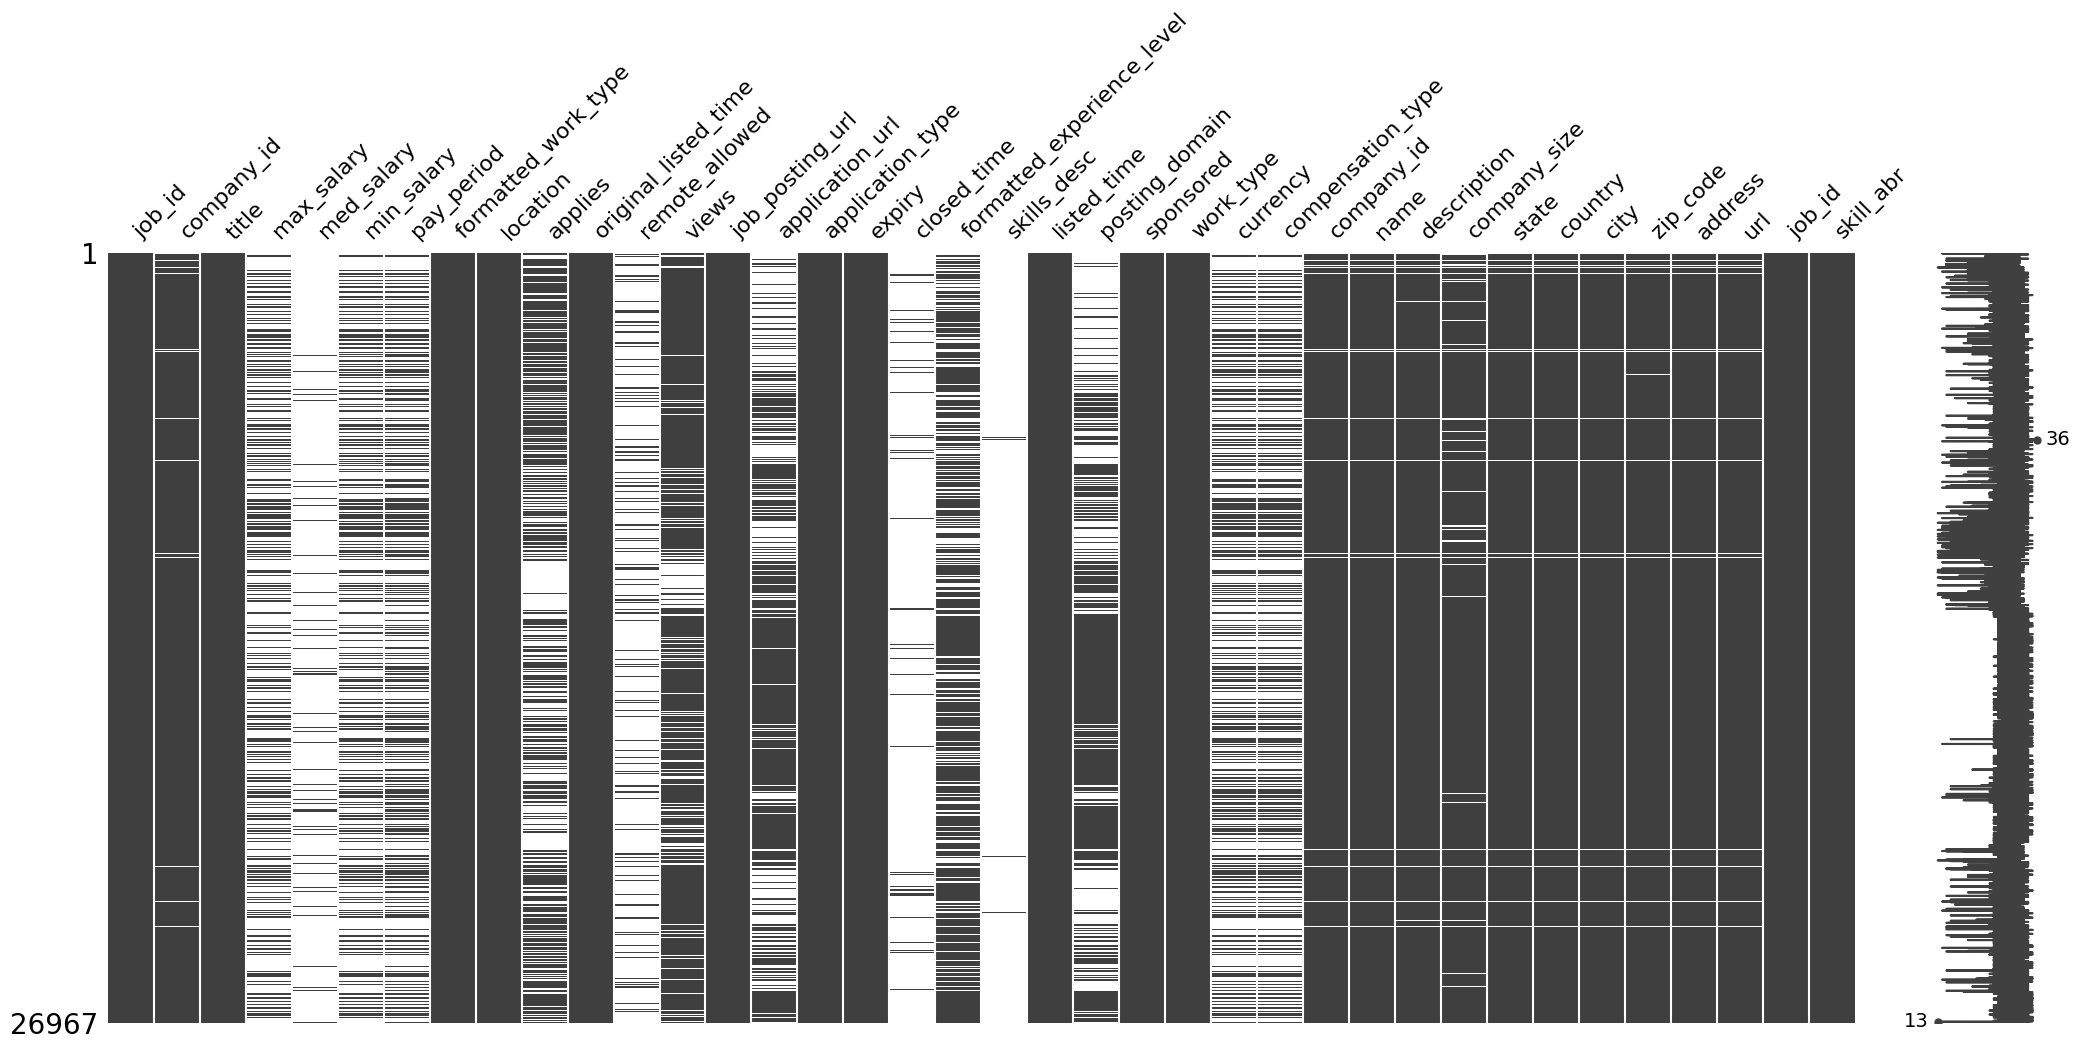

In [96]:
import missingno as msno
%matplotlib inline
msno.matrix(df_join.toPandas())

<Axes: >

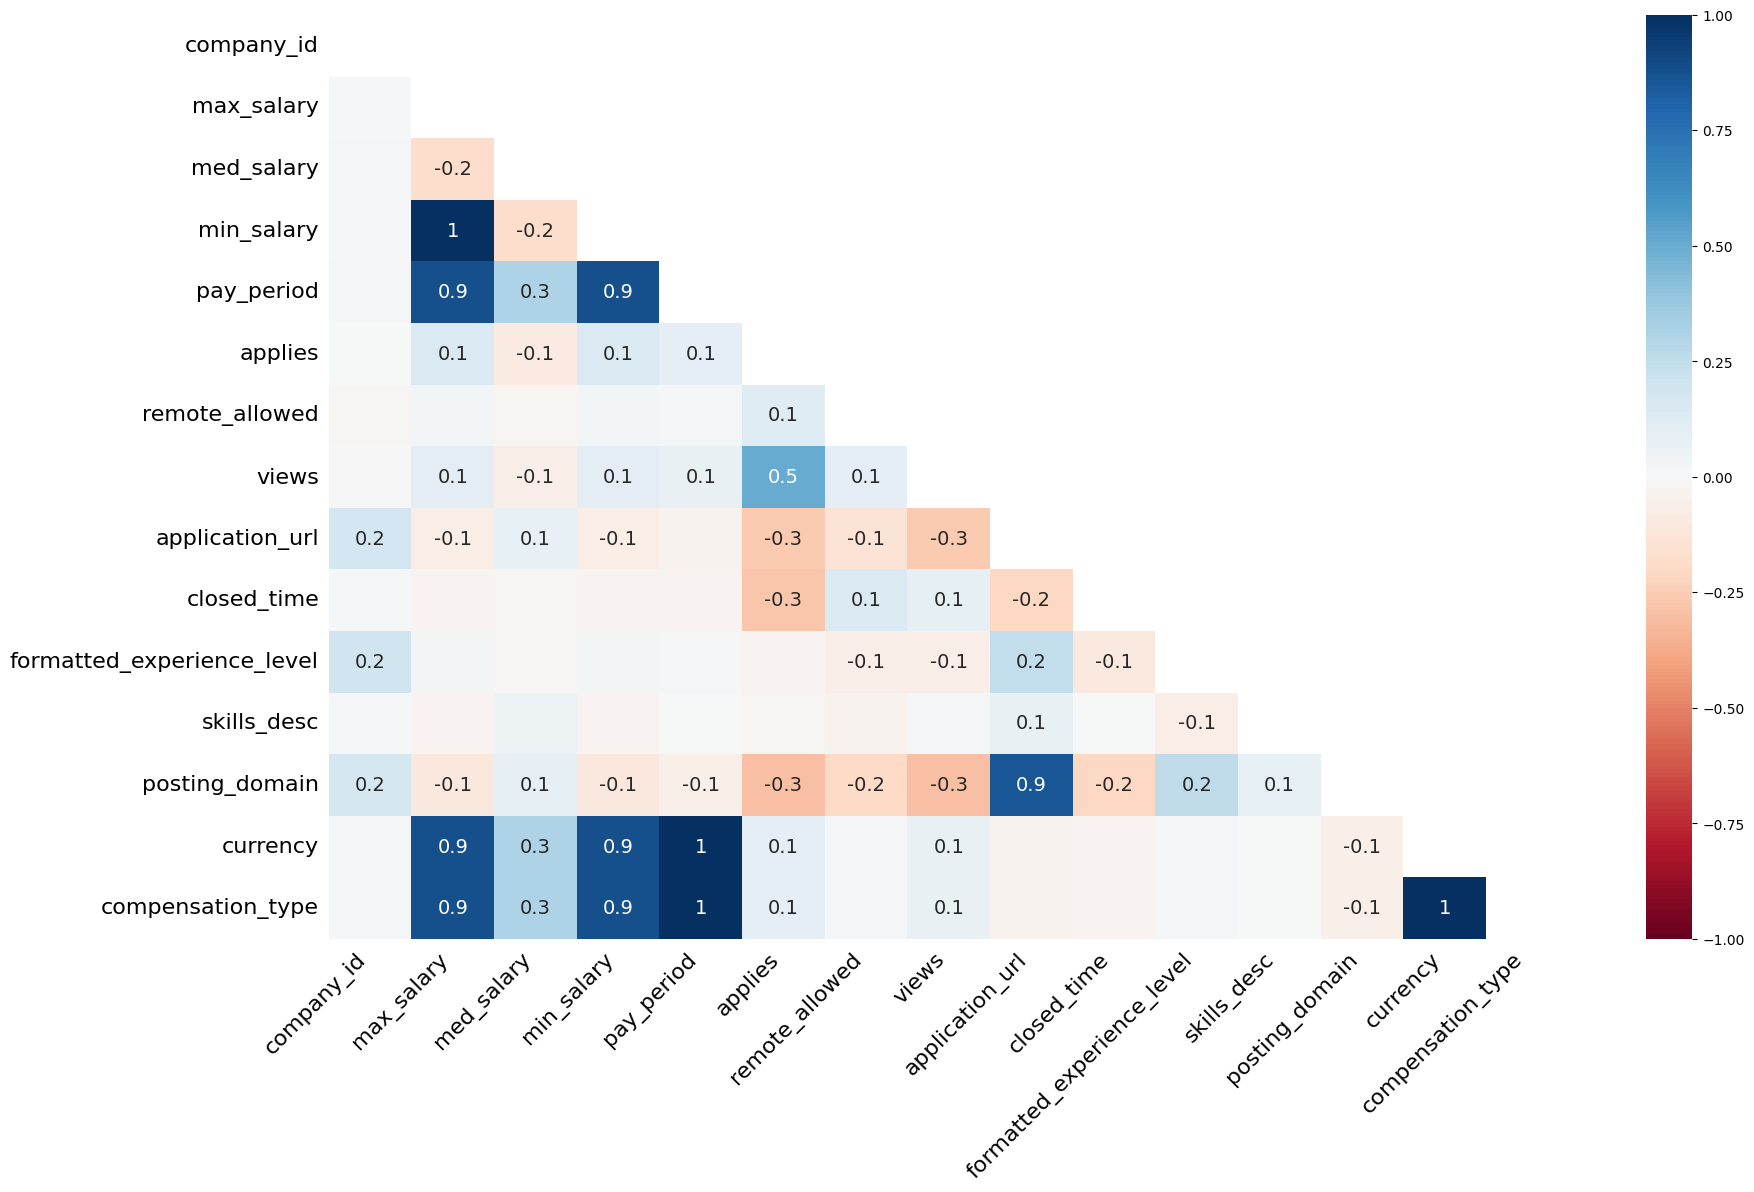

In [97]:
msno.heatmap(df_jobs.toPandas())

## Spark SQL

In [100]:
df_jobs.createOrReplaceTempView("jobs")
df_companies.createOrReplaceTempView("companies")
df_skills.createOrReplaceTempView("skills")

In [101]:
spark.sql("select * from skills").show()

+----------+---------+
|    job_id|skill_abr|
+----------+---------+
|3690843087|     ACCT|
|3690843087|      FIN|
|3691763971|     MGMT|
|3691763971|     MNFC|
|3691775263|     MGMT|
|3691775263|     MNFC|
|3691786992|     HCPR|
|3691789797|     MGMT|
|3691789797|     MNFC|
|3691789919|     HCPR|
|3691792844|      ENG|
|3691792844|       IT|
|3691793575|      ADM|
|3691794313|      ADM|
|3691795305|     HCPR|
|3691795389|     SALE|
|3691795980|       IT|
|3691796226|     DSGN|
|3691796226|      ART|
|3691796226|       IT|
+----------+---------+
only showing top 20 rows



In [ ]:
sql = """
select *
from 
tabla 
asdasd

"""

In [105]:
sql = """
          select jobs.job_id, jobs.company_id, jobs.title, jobs.min_salary, jobs.formatted_experience_level, jobs.formatted_work_type, 
          companies.name, skills.skill_abr
          from jobs 
          inner join companies on jobs.company_id = companies.company_id
          inner join skills on jobs.job_id = skills.job_id
          where lower(trim(pay_period)) = 'yearly'
          and jobs.min_salary > 0
          """
df3 = spark.sql(sql)
df3.show()

+----------+----------+--------------------+----------+--------------------------+-------------------+-------------+---------+
|    job_id|company_id|               title|min_salary|formatted_experience_level|formatted_work_type|         name|skill_abr|
+----------+----------+--------------------+----------+--------------------------+-------------------+-------------+---------+
|3694122103|    1009.0|Application Archi...|  102000.0|                      NULL|          Full-time|          IBM|       IT|
|3694122101|    1009.0|Postdoctoral Rese...|  125280.0|                      NULL|          Full-time|          IBM|      SCI|
|3694122096|    1009.0|RPA/Automation De...|   81000.0|                      NULL|          Full-time|          IBM|     OTHR|
|3694121190|    1009.0|RPA/Automation De...|   81000.0|                      NULL|          Full-time|          IBM|     OTHR|
|3694120253|    1009.0|Application Archi...|  102000.0|                      NULL|          Full-time|         

In [107]:
sql = """
        create or replace temp view job_data as
          select jobs.job_id, jobs.company_id, jobs.title, jobs.min_salary, jobs.formatted_experience_level, jobs.formatted_work_type, 
          companies.name, skills.skill_abr
          from jobs 
          inner join companies on jobs.company_id = companies.company_id
          inner join skills on jobs.job_id = skills.job_id
          where lower(trim(pay_period)) = 'yearly'
          and jobs.min_salary > 0
          """
spark.sql(sql)

spark.sql("select * from job_data").show()

+----------+----------+--------------------+----------+--------------------------+-------------------+-------------+---------+
|    job_id|company_id|               title|min_salary|formatted_experience_level|formatted_work_type|         name|skill_abr|
+----------+----------+--------------------+----------+--------------------------+-------------------+-------------+---------+
|3694122103|    1009.0|Application Archi...|  102000.0|                      NULL|          Full-time|          IBM|       IT|
|3694122101|    1009.0|Postdoctoral Rese...|  125280.0|                      NULL|          Full-time|          IBM|      SCI|
|3694122096|    1009.0|RPA/Automation De...|   81000.0|                      NULL|          Full-time|          IBM|     OTHR|
|3694121190|    1009.0|RPA/Automation De...|   81000.0|                      NULL|          Full-time|          IBM|     OTHR|
|3694120253|    1009.0|Application Archi...|  102000.0|                      NULL|          Full-time|         

In [108]:
spark.sql("""
          select formatted_experience_level, avg(min_salary) as avg_min_salary,
          count(distinct(job_id)) as qd_jobs, count(job_id) as q_job
          from job_data
          group by 1
          order by 3 desc
          """).show(truncate=False)

+--------------------------+------------------+-------+-----+
|formatted_experience_level|avg_min_salary    |qd_jobs|q_job|
+--------------------------+------------------+-------+-----+
|Mid-Senior level          |102639.19968112718|1443   |2697 |
|NULL                      |88254.63358004387 |984    |1824 |
|Entry level               |71058.53972704714 |481    |806  |
|Associate                 |79487.41587275693 |337    |613  |
|Director                  |143704.49081206496|214    |431  |
|Executive                 |129724.10020408164|43     |98   |
|Internship                |69341.16666666667 |5      |12   |
+--------------------------+------------------+-------+-----+



In [109]:
spark.sql("""
          select distinct *
          from job_data
          where formatted_experience_level is not null
          """).show(truncate=False)

+----------+----------+------------------------------------------------------------+----------+--------------------------+-------------------+----------------------------------+---------+
|job_id    |company_id|title                                                       |min_salary|formatted_experience_level|formatted_work_type|name                              |skill_abr|
+----------+----------+------------------------------------------------------------+----------+--------------------------+-------------------+----------------------------------+---------+
|3693593011|1103.0    |Retail Sales Associate                                      |43000.0   |Entry level               |Full-time          |Verizon                           |OTHR     |
|3694103054|11273.0   |Oracle EBS Techno Functional Consultant-Onsite              |135000.0  |Mid-Senior level          |Full-time          |Johnson Electric                  |IT       |
|3693584746|11660.0   |Project Manager Consultant – Corporat

In [112]:
spark.sql("""
          select cast(job_id as varchar(100)), job_id,
          current_timestamp(),
          current_date()
          from job_data
          """).show()

+----------+----------+--------------------+--------------+
|    job_id|    job_id| current_timestamp()|current_date()|
+----------+----------+--------------------+--------------+
|3694122103|3694122103|2024-10-14 21:48:...|    2024-10-14|
|3694122101|3694122101|2024-10-14 21:48:...|    2024-10-14|
|3694122096|3694122096|2024-10-14 21:48:...|    2024-10-14|
|3694121190|3694121190|2024-10-14 21:48:...|    2024-10-14|
|3694120253|3694120253|2024-10-14 21:48:...|    2024-10-14|
|3694119354|3694119354|2024-10-14 21:48:...|    2024-10-14|
|3694119351|3694119351|2024-10-14 21:48:...|    2024-10-14|
|3694118788|3694118788|2024-10-14 21:48:...|    2024-10-14|
|3694117821|3694117821|2024-10-14 21:48:...|    2024-10-14|
|3694116841|3694116841|2024-10-14 21:48:...|    2024-10-14|
|3694116817|3694116817|2024-10-14 21:48:...|    2024-10-14|
|3694116815|3694116815|2024-10-14 21:48:...|    2024-10-14|
|3694116814|3694116814|2024-10-14 21:48:...|    2024-10-14|
|3694116807|3694116807|2024-10-14 21:48:

24/10/14 21:48:59 WARN CharVarcharUtils: The Spark cast operator does not support char/varchar type and simply treats them as string type. Please use string type directly to avoid confusion. Otherwise, you can set spark.sql.legacy.charVarcharAsString to true, so that Spark treat them as string type as same as Spark 3.0 and earlier
